In [7]:
pip install -r ../requirements.txt

  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)
Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl (7.1 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----

In [8]:
import pandas as pd
import numpy as np

# Read the data file
df = pd.read_csv('../data/IndeedJobScraperIntern.csv')

# Display basic info about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")

# Check the Posted_Date column
print(f"\nPosted_Date column info:")
print(df['Posted_Date'].describe())

# Convert Posted_Date to datetime
df['Posted_Date'] = pd.to_datetime(df['Posted_Date'], errors='coerce')

# Find the range (min and max)
min_date = df['Posted_Date'].min()
max_date = df['Posted_Date'].max()

print(f"\nDate Range in Posted_Date column:")
print(f"Minimum (Earliest) Date: {min_date}")
print(f"Maximum (Latest) Date: {max_date}")
print(f"Date Range: {max_date - min_date}")

# Check for any null values
null_count = df['Posted_Date'].isna().sum()
print(f"\nNull values in Posted_Date: {null_count}")


Dataset shape: (474, 20)

Column names: ['Site', 'Search_Term', 'Search_Location', 'URL_Input', 'Total_Result', 'Job_Title', 'Job_ID', 'Job_URL', 'Job_Type', 'Salary', 'Location', 'Full_Description', 'Company_Name', 'Company_URL', 'Company_Rating', 'Company_Review_Count', 'Posted_Date', 'isExpired', 'Valid_Through', 'Apply_Link']

Posted_Date column info:
count                          474
unique                         473
top       2025-08-27T01:19:50.177Z
freq                             2
Name: Posted_Date, dtype: object

Date Range in Posted_Date column:
Minimum (Earliest) Date: 2024-11-22 17:12:56.219000+00:00
Maximum (Latest) Date: 2025-12-17 12:53:19.602000+00:00
Date Range: 389 days 19:40:23.383000

Null values in Posted_Date: 0


In [22]:
import re

# Define all skills by category
skills = {
    'Programming': ['Python', 'SQL', 'R', 'Julia', 'Rust', 'Scala', 'Java', 'C++', 'C#', 'Kotlin', 'Go', 'Pyspark', 
                    'JavaScript', 'TypeScript'],
    'Mathematics & Statistics': ['Linear Algebra', 'Calculus', 'Probability', 'Statistics', 'Bayesian Inference', 
                                 'Optimization', 'Resampling', 'Cross-validation', 'Bootstrapping', 'Matrix operations', 
                                 'Partial derivatives'],
    'Machine Learning': ['Supervised Learning', 'Unsupervised Learning', 'Deep Learning', 'Reinforcement Learning', 
                         'Reinforcement Learning (RL)', 'RL', 'XGBoost', 'CatBoost', 'Random Forest', 'CNN', 'RNN', 
                         'Transformers', 'SVM'],
    'AI Agents & Generative AI': ['AI Agents', 'Agentic AI', 'Multi-agent systems', 'LLMs', 'NLP', 'Prompt Engineering', 
                                  'Retrieval-Augmented Generation', 'RAG', 'Model Context Protocol', 'MCP', 
                                  'Agent-to-Agent', 'A2A', 'A2A protocols', 'Fine-tuning', 'Token optimization', 
                                  'Context management', 'Agent hierarchies'],
    'Agentic Frameworks & Tools': ['LangChain', 'CrewAI', 'AutoGen', 'LangGraph', 'AutoGPT', 'LlamaIndex', 
                                   'Microsoft Semantic Kernel', 'OpenAI Swarm', 'Vercel AI SDK', 'DSPy', 
                                   'Amazon Bedrock AgentCore', 'Hugging Face Transformers Agents', 'Langflow'],
    'Causal Inference & Experimentation': ['A/B Testing', 'Geo Experiments', 'Difference-in-Differences', 'DiD', 
                                            'Synthetic Control', 'Instrumental Variables', 'Propensity Score Matching', 
                                            'Uplift Modeling', 'Quasi-experimental design'],
    'Data Engineering & MLOps': ['ETL', 'ELT', 'ETL/ELT', 'Docker', 'Kubernetes', 'Apache Spark', 'Spark', 'Kafka', 
                                 'Airflow', 'dbt', 'MLflow', 'CI/CD', 'MLOps', 'Model monitoring', 'Observability', 
                                 'Tracing', 'AI Guardrails', 'Red-teaming'],
    'Database Systems': ['PostgreSQL', 'MySQL', 'Agentic Postgres', 'NoSQL', 'MongoDB', 'Cassandra', 'Redis', 'Neo4j', 
                        'Snowflake', 'BigQuery', 'Vector Databases', 'Pinecone', 'Milvus', 'Weaviate', 'Qdrant', 
                        'Chroma', 'FAISS', 'Databricks'],
    'Visualization & BI': ['Tableau', 'Power BI', 'Looker', 'D3.js', 'Plotly', 'Dash', 'Matplotlib', 'Seaborn', 
                          'Streamlit'],
    'Cloud': ['AWS', 'Amazon Web Services', 'Azure', 'Microsoft Azure', 'Google Cloud', 'GCP', 'Google Cloud Platform'],
    'Professional Skills & Ethics': ['Communication', 'Data Storytelling', 'Responsible AI', 'Ethical Governance', 'GDPR 2.0', 
                                    'AI Act compliance', 'Domain Expertise', 'Cross-functional collaboration', 
                                    'Problem-solving', 'Critical Thinking']
}

# Flatten all skills into a single list with their categories
all_skills = []
for category, skill_list in skills.items():
    for skill in skill_list:
        all_skills.append((skill, category))

# Function to count skill occurrences in text (case-insensitive, word boundary aware)
def count_skill_frequency(df, skills_list):
    skill_counts = {}
    total_jobs = len(df)
    
    # Get all Full_Description texts
    descriptions = df['Full_Description'].fillna('').astype(str)
    
    for skill, category in skills_list:
        # Create regex pattern with word boundaries for exact matches
        # Handle special characters in skill names
        pattern = r'\b' + re.escape(skill) + r'\b'
        count = descriptions.str.contains(pattern, case=False, na=False, regex=True).sum()
        skill_counts[skill] = {
            'count': count,
            'percentage': (count / total_jobs * 100) if total_jobs > 0 else 0,
            'category': category
        }
    
    return skill_counts

# Calculate skill frequencies
skill_frequencies = count_skill_frequency(df, all_skills)

# Create a DataFrame for better visualization
skill_df = pd.DataFrame([
    {
        'Skill': skill,
        'Category': info['category'],
        'Count': info['count'],
        'Percentage': info['percentage']
    }
    for skill, info in skill_frequencies.items()
])

# Sort by count descending
skill_df = skill_df.sort_values('Count', ascending=False)

# Display results by category
print("=" * 80)
print("SKILL FREQUENCY ANALYSIS")
print("=" * 80)
print(f"\nTotal jobs analyzed: {len(df)}")
print(f"Total unique skills searched: {len(all_skills)}\n")

# Display top skills overall
print("\n" + "=" * 80)
print("TOP 20 MOST FREQUENT SKILLS")
print("=" * 80)
print(skill_df.head(20).to_string(index=False))

# Display by category
print("\n" + "=" * 80)
print("SKILL FREQUENCIES BY CATEGORY")
print("=" * 80)

for category in skills.keys():
    category_skills = skill_df[skill_df['Category'] == category].sort_values('Count', ascending=False)
    if len(category_skills) > 0:
        print(f"\n{category}:")
        print("-" * 80)
        print(category_skills.to_string(index=False))
        print(f"\nTotal mentions in {category}: {category_skills['Count'].sum()}")
        print(f"Average percentage per skill: {category_skills['Percentage'].mean():.2f}%")

# Summary statistics
print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
print(f"\nTotal skill mentions: {skill_df['Count'].sum()}")
print(f"Average mentions per skill: {skill_df['Count'].mean():.2f}")
print(f"Median mentions per skill: {skill_df['Count'].median():.2f}")
print(f"Skills with 0 mentions: {(skill_df['Count'] == 0).sum()}")
print(f"Skills with 10+ mentions: {(skill_df['Count'] >= 10).sum()}")
print(f"Skills with 50+ mentions: {(skill_df['Count'] >= 50).sum()}")
print(f"Skills with 100+ mentions: {(skill_df['Count'] >= 100).sum()}")


SKILL FREQUENCY ANALYSIS

Total jobs analyzed: 474
Total unique skills searched: 139


TOP 20 MOST FREQUENT SKILLS
          Skill                     Category  Count  Percentage
         Python                  Programming    360   75.949367
  Communication Professional Skills & Ethics    260   54.852321
     Statistics     Mathematics & Statistics    163   34.388186
            SQL                  Programming    161   33.966245
Problem-solving Professional Skills & Ethics    146   30.801688
              R                  Programming    136   28.691983
   Optimization     Mathematics & Statistics     97   20.464135
  Deep Learning             Machine Learning     93   19.620253
            AWS                        Cloud     80   16.877637
           LLMs    AI Agents & Generative AI     77   16.244726
            NLP    AI Agents & Generative AI     75   15.822785
          Azure                        Cloud     71   14.978903
           Java                  Programming     57  

In [17]:
# Get top 20 skills
top_20_skills = skill_df.head(20)['Skill'].tolist()
print(f"Analyzing trends for top 20 skills: {top_20_skills}\n")

# Ensure Posted_Date is datetime and create a month column
df['Posted_Date'] = pd.to_datetime(df['Posted_Date'], errors='coerce')
df['Year_Month'] = df['Posted_Date'].dt.to_period('M')
df['Year_Month_str'] = df['Posted_Date'].dt.strftime('%Y-%m')

# Remove rows with null dates
df_clean = df.dropna(subset=['Posted_Date', 'Year_Month']).copy()

print(f"Jobs with valid dates: {len(df_clean)}")
print(f"Date range: {df_clean['Posted_Date'].min()} to {df_clean['Posted_Date'].max()}")
print(f"Month range: {df_clean['Year_Month'].min()} to {df_clean['Year_Month'].max()}\n")

# Function to check if skill appears in description
def check_skill_in_description(description, skill):
    pattern = r'\b' + re.escape(skill) + r'\b'
    return bool(re.search(pattern, str(description), re.IGNORECASE))

# Create a dictionary to store monthly counts for each skill
monthly_trends = {}

# For each top 20 skill, count occurrences by month
for skill in top_20_skills:
    monthly_counts = []
    
    # Group by month and count occurrences
    for month in sorted(df_clean['Year_Month'].unique()):
        month_data = df_clean[df_clean['Year_Month'] == month]
        descriptions = month_data['Full_Description'].fillna('').astype(str)
        
        # Count how many job descriptions contain this skill
        count = descriptions.apply(lambda desc: check_skill_in_description(desc, skill)).sum()
        total_jobs = len(month_data)
        percentage = (count / total_jobs * 100) if total_jobs > 0 else 0
        
        monthly_counts.append({
            'Year_Month': str(month),
            'Year_Month_str': month_data['Year_Month_str'].iloc[0] if len(month_data) > 0 else str(month),
            'Count': count,
            'Total_Jobs': total_jobs,
            'Percentage': percentage
        })
    
    monthly_trends[skill] = pd.DataFrame(monthly_counts)

# Create a combined DataFrame for all top 20 skills
trend_data_list = []
for skill in top_20_skills:
    skill_trend = monthly_trends[skill].copy()
    skill_trend['Skill'] = skill
    trend_data_list.append(skill_trend)

trend_df = pd.concat(trend_data_list, ignore_index=True)

# Display summary table
print("=" * 100)
print("MONTHLY TRENDS FOR TOP 20 SKILLS")
print("=" * 100)

# Pivot table: skills as rows, months as columns, values as counts
pivot_counts = trend_df.pivot_table(
    index='Skill', 
    columns='Year_Month_str', 
    values='Count', 
    fill_value=0
)

# Reorder columns by date
pivot_counts = pivot_counts.reindex(sorted(pivot_counts.columns), axis=1)

print("\nCount of job postings mentioning each skill by month:")
print(pivot_counts.to_string())

# Pivot table for percentages
pivot_percentages = trend_df.pivot_table(
    index='Skill', 
    columns='Year_Month_str', 
    values='Percentage', 
    fill_value=0
)

# Reorder columns by date
pivot_percentages = pivot_percentages.reindex(sorted(pivot_percentages.columns), axis=1)

print("\n\nPercentage of job postings mentioning each skill by month:")
print(pivot_percentages.round(2).to_string())

# Summary statistics by skill
print("\n" + "=" * 100)
print("TREND SUMMARY STATISTICS")
print("=" * 100)

trend_summary = []
for skill in top_20_skills:
    skill_data = trend_df[trend_df['Skill'] == skill]
    trend_summary.append({
        'Skill': skill,
        'Total_Months': len(skill_data),
        'Avg_Count_Per_Month': skill_data['Count'].mean(),
        'Max_Count': skill_data['Count'].max(),
        'Min_Count': skill_data['Count'].min(),
        'Avg_Percentage': skill_data['Percentage'].mean(),
        'Trend_Last_3_Months': skill_data.tail(3)['Count'].mean() if len(skill_data) >= 3 else skill_data['Count'].mean(),
        'Trend_First_3_Months': skill_data.head(3)['Count'].mean() if len(skill_data) >= 3 else skill_data['Count'].mean()
    })

trend_summary_df = pd.DataFrame(trend_summary)
trend_summary_df['Change_Rate'] = ((trend_summary_df['Trend_Last_3_Months'] - trend_summary_df['Trend_First_3_Months']) / 
                                   (trend_summary_df['Trend_First_3_Months'] + 1) * 100)
trend_summary_df = trend_summary_df.sort_values('Avg_Count_Per_Month', ascending=False)

print("\nTrend Summary (sorted by average count per month):")
print(trend_summary_df.to_string(index=False))


Analyzing trends for top 20 skills: ['Python', 'Communication', 'Statistics', 'SQL', 'Problem-solving', 'R', 'Optimization', 'Deep Learning', 'AWS', 'LLMs', 'NLP', 'Azure', 'Java', 'Power BI', 'Tableau', 'Go', 'Spark', 'GCP', 'JavaScript', 'RAG']

Jobs with valid dates: 474
Date range: 2024-11-22 17:12:56.219000+00:00 to 2025-12-17 12:53:19.602000+00:00
Month range: 2024-11 to 2025-12



C:\Users\nhphuong\AppData\Local\Temp\ipykernel_91224\513709132.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year_Month'] = df['Posted_Date'].dt.to_period('M')


MONTHLY TRENDS FOR TOP 20 SKILLS

Count of job postings mentioning each skill by month:
Year_Month_str   2024-11  2024-12  2025-01  2025-02  2025-03  2025-04  2025-05  2025-06  2025-07  2025-08  2025-09  2025-10  2025-11  2025-12
Skill                                                                                                                                        
AWS                  2.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      3.0     17.0     10.0     22.0     25.0
Azure                2.0      0.0      0.0      0.0      1.0      0.0      1.0      0.0      0.0      2.0     16.0     10.0     22.0     17.0
Communication        4.0      1.0      2.0      0.0      1.0      0.0      2.0      0.0      6.0     17.0     37.0     40.0     69.0     81.0
Deep Learning        1.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0      2.0      4.0     22.0     18.0     21.0     24.0
GCP                  0.0      0.0      0.0      0.0      1.0

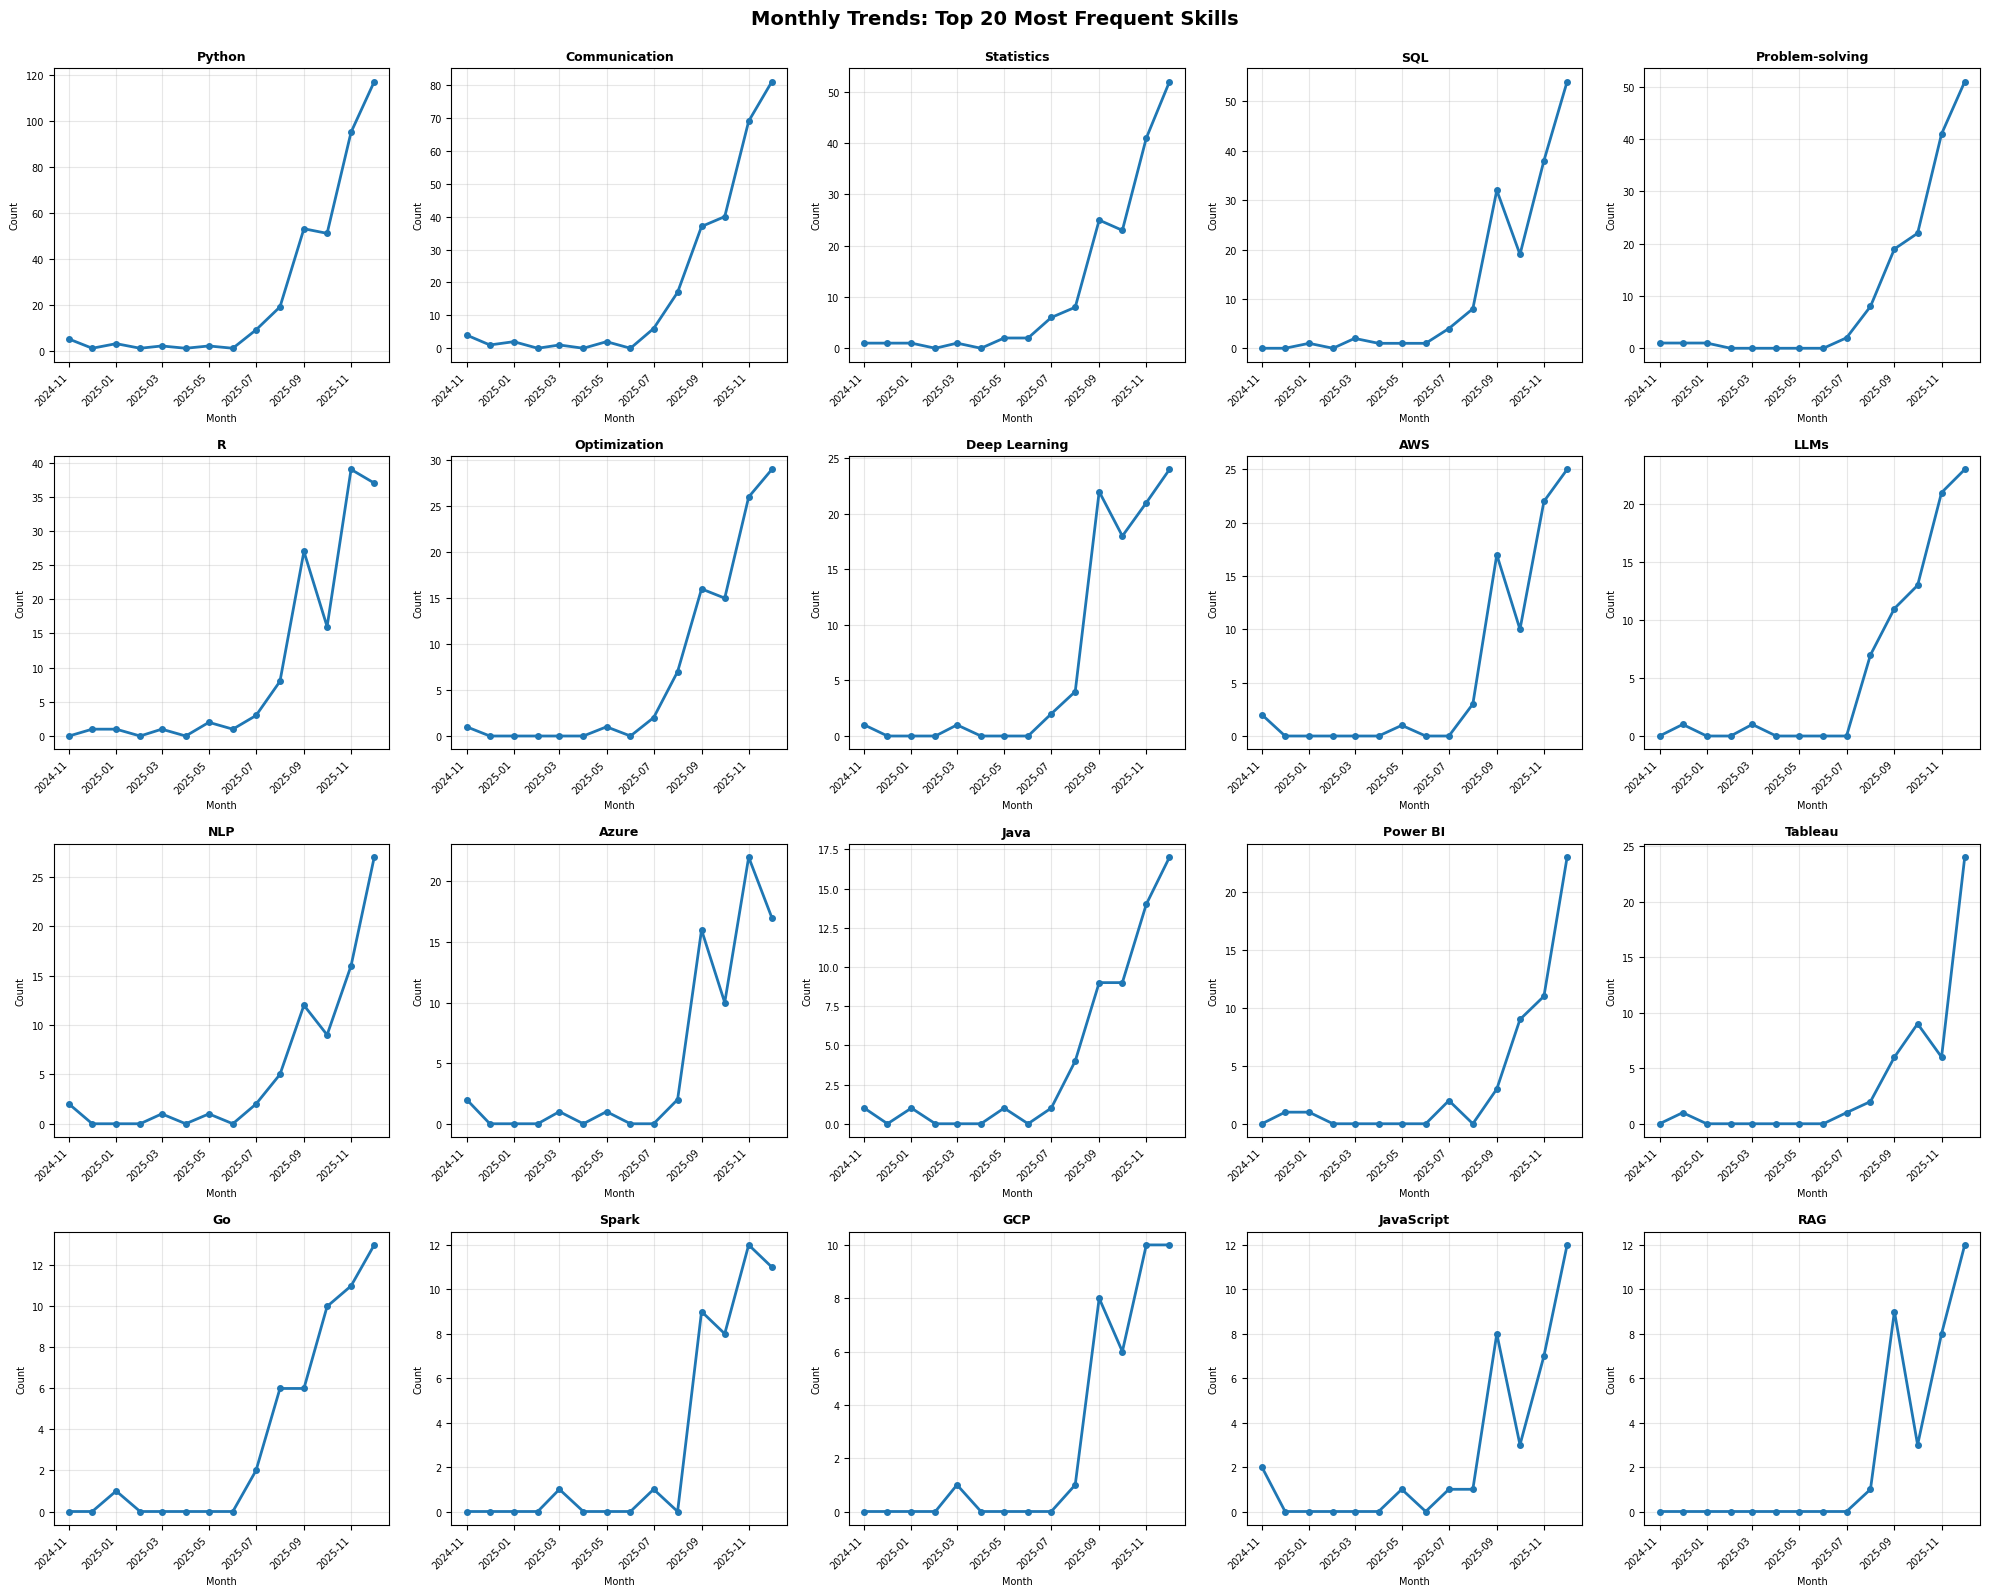

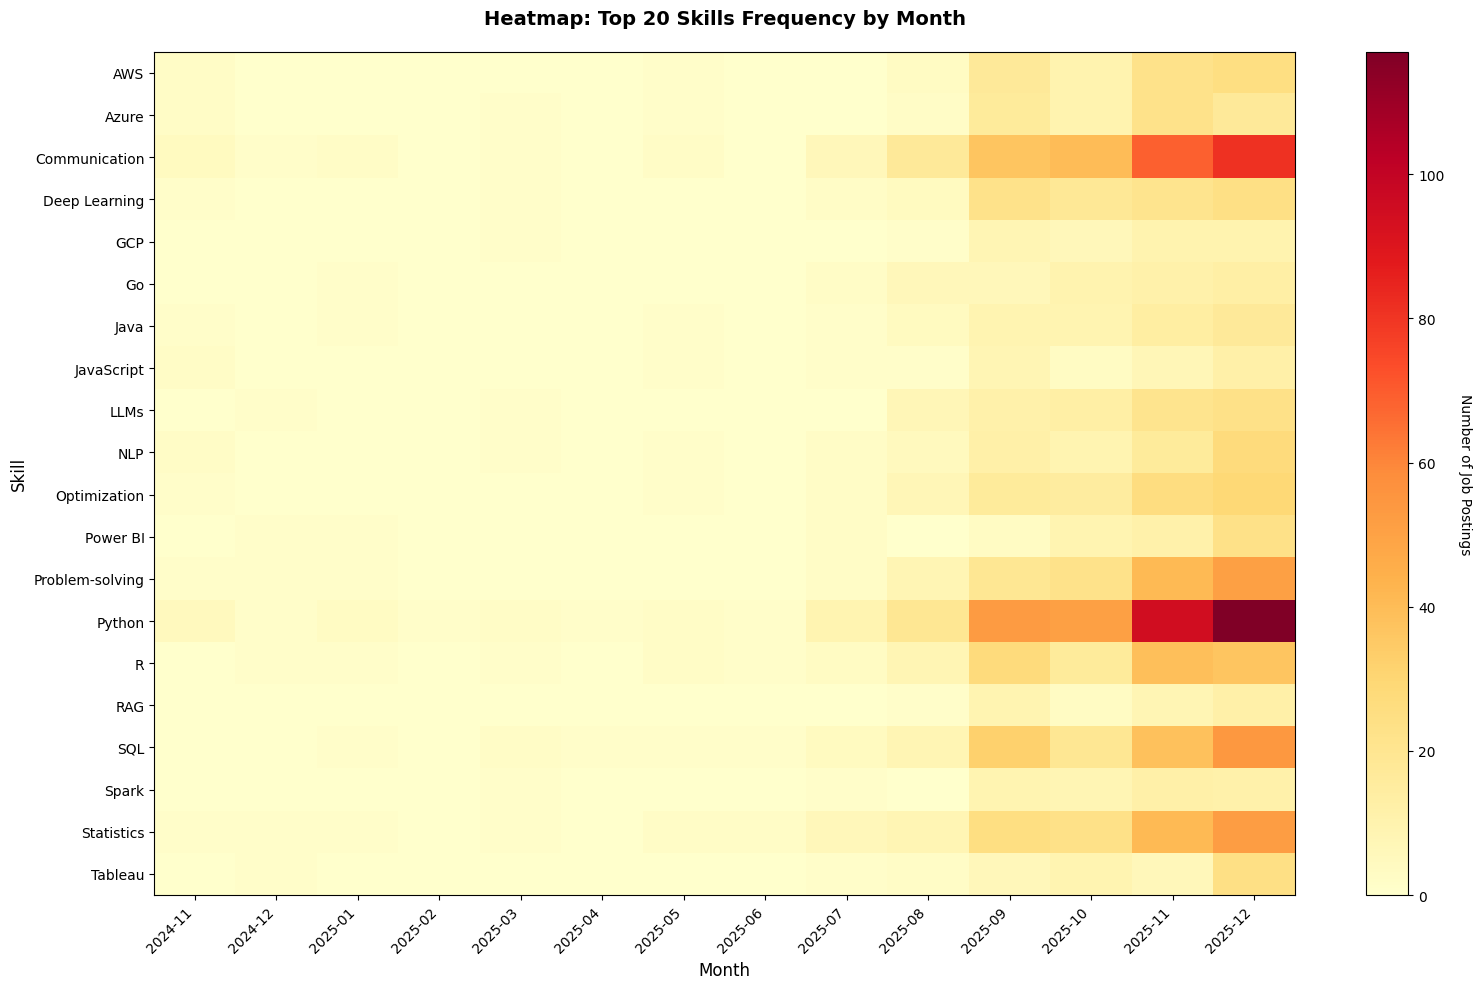

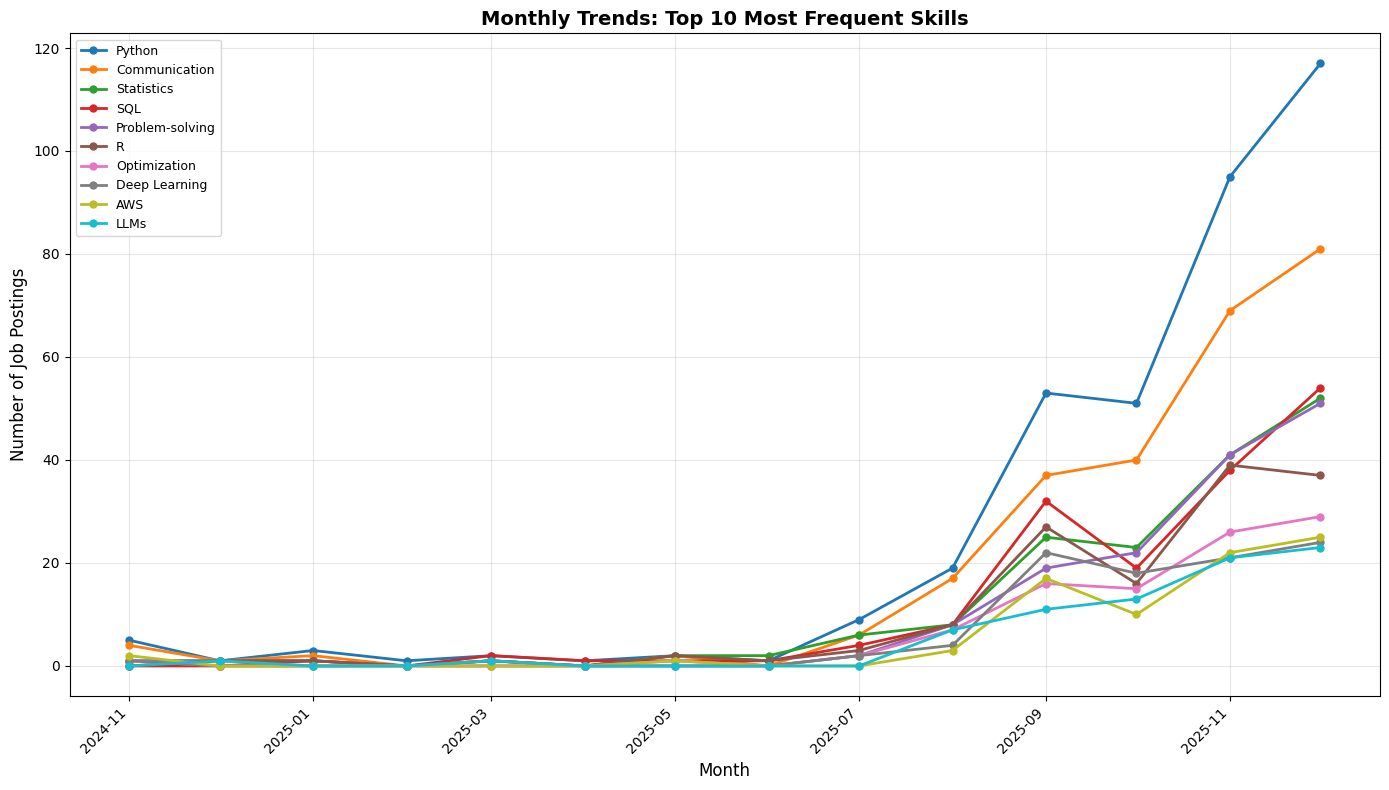


Visualizations created!


In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

# Convert Year_Month_str to datetime for plotting
trend_df['Date'] = pd.to_datetime(trend_df['Year_Month_str'] + '-01')

# Plot each skill
for idx, skill in enumerate(top_20_skills):
    skill_data = trend_df[trend_df['Skill'] == skill].sort_values('Date')
    
    ax = axes[idx]
    ax.plot(skill_data['Date'], skill_data['Count'], marker='o', linewidth=2, markersize=4)
    ax.set_title(skill, fontsize=9, fontweight='bold')
    ax.set_xlabel('Month', fontsize=7)
    ax.set_ylabel('Count', fontsize=7)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=7)
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.suptitle('Monthly Trends: Top 20 Most Frequent Skills', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Create a heatmap visualization
fig, ax = plt.subplots(figsize=(16, 10))

# Prepare data for heatmap (skills vs months)
heatmap_data = pivot_counts.copy()
heatmap_data.index.name = 'Skill'

# Create heatmap
im = ax.imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')

# Set ticks and labels
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns, rotation=45, ha='right')
ax.set_yticks(range(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Number of Job Postings', rotation=270, labelpad=20)

ax.set_title('Heatmap: Top 20 Skills Frequency by Month', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Skill', fontsize=12)

plt.tight_layout()
plt.show()

# Line plot for top 10 skills (for better readability)
fig, ax = plt.subplots(figsize=(14, 8))

top_10_skills = top_20_skills[:10]
for skill in top_10_skills:
    skill_data = trend_df[trend_df['Skill'] == skill].sort_values('Date')
    ax.plot(skill_data['Date'], skill_data['Count'], marker='o', linewidth=2, label=skill, markersize=5)

ax.set_title('Monthly Trends: Top 10 Most Frequent Skills', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Job Postings', fontsize=12)
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nVisualizations created!")


In [19]:
# Analyze Company_Name column
print("=" * 80)
print("COMPANY ANALYSIS")
print("=" * 80)

# Basic statistics
total_jobs = len(df)
unique_companies = df['Company_Name'].nunique()
null_companies = df['Company_Name'].isna().sum()

print(f"\nTotal job postings: {total_jobs}")
print(f"Unique companies: {unique_companies}")
print(f"Null/empty company names: {null_companies}")
print(f"Companies with valid names: {total_jobs - null_companies}")

# Companies with most job postings
company_counts = df['Company_Name'].value_counts()
print(f"\n" + "=" * 80)
print("TOP 20 COMPANIES BY NUMBER OF JOB POSTINGS")
print("=" * 80)
print(company_counts.head(20).to_string())

# Statistics about company distribution
print(f"\n" + "=" * 80)
print("COMPANY DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"Companies with 1 job posting: {(company_counts == 1).sum()}")
print(f"Companies with 2-5 job postings: {((company_counts >= 2) & (company_counts <= 5)).sum()}")
print(f"Companies with 6-10 job postings: {((company_counts >= 6) & (company_counts <= 10)).sum()}")
print(f"Companies with 11-20 job postings: {((company_counts >= 11) & (company_counts <= 20)).sum()}")
print(f"Companies with 21+ job postings: {(company_counts >= 21).sum()}")

# Percentage of jobs from top companies
top_10_companies_jobs = company_counts.head(10).sum()
top_20_companies_jobs = company_counts.head(20).sum()
print(f"\nTop 10 companies account for: {top_10_companies_jobs} jobs ({top_10_companies_jobs/total_jobs*100:.2f}%)")
print(f"Top 20 companies account for: {top_20_companies_jobs} jobs ({top_20_companies_jobs/total_jobs*100:.2f}%)")

# Create a DataFrame for better analysis
company_df = pd.DataFrame({
    'Company_Name': company_counts.index,
    'Job_Count': company_counts.values,
    'Percentage': (company_counts.values / total_jobs * 100)
}).reset_index(drop=True)

print(f"\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
print(f"Number of different companies in the dataset: {unique_companies}")
print(f"Average jobs per company: {company_counts.mean():.2f}")
print(f"Median jobs per company: {company_counts.median():.2f}")
print(f"Max jobs from a single company: {company_counts.max()}")


COMPANY ANALYSIS

Total job postings: 474
Unique companies: 339
Null/empty company names: 0
Companies with valid names: 474

TOP 20 COMPANIES BY NUMBER OF JOB POSTINGS
Company_Name
AbbVie                                            7
Adobe                                             7
TikTok                                            7
Seagate Technology                                5
Corsair                                           5
Johns Hopkins Applied Physics Laboratory (APL)    5
Intercontinental Exchange Holdings, Inc.          5
ZS                                                5
MidAmerican Energy Company                        5
ByteDance                                         5
CVS Health                                        5
KLA                                               4
Waymo                                             4
Samsung Research America Internship               4
Gilead Sciences                                   4
Genentech                              

In [20]:
# Analyze R and Python mentions
print("=" * 80)
print("R AND PYTHON ANALYSIS")
print("=" * 80)

# Function to check if skill appears in description (case-insensitive, word boundary)
def check_skill(description, skill):
    pattern = r'\b' + re.escape(skill) + r'\b'
    return bool(re.search(pattern, str(description), re.IGNORECASE))

# Check for Python and R mentions
descriptions = df['Full_Description'].fillna('').astype(str)
has_python = descriptions.apply(lambda desc: check_skill(desc, 'Python'))
has_r = descriptions.apply(lambda desc: check_skill(desc, 'R'))

# Create combinations
both_r_python = has_python & has_r
only_python = has_python & ~has_r
only_r = has_r & ~has_python
neither = ~has_python & ~has_r

# Count each category
total_jobs = len(df)
count_both = both_r_python.sum()
count_only_python = only_python.sum()
count_only_r = only_r.sum()
count_neither = neither.sum()

print(f"\nTotal job postings: {total_jobs}")
print(f"\n" + "-" * 80)
print("BREAKDOWN:")
print("-" * 80)
print(f"Jobs mentioning BOTH R and Python: {count_both} ({count_both/total_jobs*100:.2f}%)")
print(f"Jobs mentioning ONLY Python (not R): {count_only_python} ({count_only_python/total_jobs*100:.2f}%)")
print(f"Jobs mentioning ONLY R (not Python): {count_only_r} ({count_only_r/total_jobs*100:.2f}%)")
print(f"Jobs mentioning NEITHER R nor Python: {count_neither} ({count_neither/total_jobs*100:.2f}%)")

print(f"\n" + "-" * 80)
print("SUMMARY:")
print("-" * 80)
print(f"Jobs mentioning Python (with or without R): {has_python.sum()} ({has_python.sum()/total_jobs*100:.2f}%)")
print(f"Jobs mentioning R (with or without Python): {has_r.sum()} ({has_r.sum()/total_jobs*100:.2f}%)")
print(f"Jobs mentioning either Python OR R: {(has_python | has_r).sum()} ({(has_python | has_r).sum()/total_jobs*100:.2f}%)")

# Verify the math
print(f"\n" + "-" * 80)
print("VERIFICATION:")
print("-" * 80)
print(f"Both + Only Python + Only R + Neither = {count_both + count_only_python + count_only_r + count_neither}")
print(f"Should equal total: {total_jobs}")

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Category': [
        'Both R and Python',
        'Only Python (not R)',
        'Only R (not Python)',
        'Neither R nor Python',
        'Total'
    ],
    'Count': [
        count_both,
        count_only_python,
        count_only_r,
        count_neither,
        total_jobs
    ],
    'Percentage': [
        count_both/total_jobs*100,
        count_only_python/total_jobs*100,
        count_only_r/total_jobs*100,
        count_neither/total_jobs*100,
        100.0
    ]
})

print(f"\n" + "=" * 80)
print("SUMMARY TABLE")
print("=" * 80)
print(summary_df.to_string(index=False))


R AND PYTHON ANALYSIS

Total job postings: 474

--------------------------------------------------------------------------------
BREAKDOWN:
--------------------------------------------------------------------------------
Jobs mentioning BOTH R and Python: 122 (25.74%)
Jobs mentioning ONLY Python (not R): 238 (50.21%)
Jobs mentioning ONLY R (not Python): 14 (2.95%)
Jobs mentioning NEITHER R nor Python: 100 (21.10%)

--------------------------------------------------------------------------------
SUMMARY:
--------------------------------------------------------------------------------
Jobs mentioning Python (with or without R): 360 (75.95%)
Jobs mentioning R (with or without Python): 136 (28.69%)
Jobs mentioning either Python OR R: 374 (78.90%)

--------------------------------------------------------------------------------
VERIFICATION:
--------------------------------------------------------------------------------
Both + Only Python + Only R + Neither = 474
Should equal total: 474

S

In [21]:
# Rank skills by category/bucket
print("=" * 100)
print("SKILL RANKING BY CATEGORY")
print("=" * 100)

# Calculate category-level statistics
category_stats = []
for category in skills.keys():
    category_skills = skill_df[skill_df['Category'] == category]
    
    if len(category_skills) > 0:
        category_stats.append({
            'Category': category,
            'Total_Skills': len(category_skills),
            'Total_Mentions': category_skills['Count'].sum(),
            'Avg_Mentions_Per_Skill': category_skills['Count'].mean(),
            'Max_Mentions': category_skills['Count'].max(),
            'Min_Mentions': category_skills['Count'].min(),
            'Median_Mentions': category_skills['Count'].median(),
            'Top_Skill': category_skills.loc[category_skills['Count'].idxmax(), 'Skill'],
            'Top_Skill_Count': category_skills['Count'].max(),
            'Skills_with_0_Mentions': (category_skills['Count'] == 0).sum(),
            'Avg_Percentage': category_skills['Percentage'].mean()
        })

category_ranking_df = pd.DataFrame(category_stats)

# Rank categories by different metrics
print("\n" + "=" * 100)
print("CATEGORY RANKING BY TOTAL MENTIONS")
print("=" * 100)
category_ranking_total = category_ranking_df.sort_values('Total_Mentions', ascending=False)
print(category_ranking_total[['Category', 'Total_Mentions', 'Total_Skills', 'Avg_Mentions_Per_Skill', 
                               'Top_Skill', 'Top_Skill_Count']].to_string(index=False))

print("\n" + "=" * 100)
print("CATEGORY RANKING BY AVERAGE MENTIONS PER SKILL")
print("=" * 100)
category_ranking_avg = category_ranking_df.sort_values('Avg_Mentions_Per_Skill', ascending=False)
print(category_ranking_avg[['Category', 'Avg_Mentions_Per_Skill', 'Total_Mentions', 'Total_Skills', 
                            'Top_Skill', 'Top_Skill_Count']].to_string(index=False))

print("\n" + "=" * 100)
print("CATEGORY RANKING BY TOP SKILL COUNT")
print("=" * 100)
category_ranking_top = category_ranking_df.sort_values('Top_Skill_Count', ascending=False)
print(category_ranking_top[['Category', 'Top_Skill', 'Top_Skill_Count', 'Total_Mentions', 
                            'Avg_Mentions_Per_Skill']].to_string(index=False))

# Display skills ranked within each category
print("\n" + "=" * 100)
print("SKILLS RANKED WITHIN EACH CATEGORY")
print("=" * 100)

for category in category_ranking_total['Category']:
    category_skills = skill_df[skill_df['Category'] == category].sort_values('Count', ascending=False)
    
    print(f"\n{'=' * 100}")
    print(f"CATEGORY: {category}")
    print(f"{'=' * 100}")
    print(f"Total Skills: {len(category_skills)} | Total Mentions: {category_skills['Count'].sum()} | "
          f"Avg per Skill: {category_skills['Count'].mean():.2f}")
    print(f"\nRanked Skills:")
    print("-" * 100)
    
    # Add rank column
    category_skills_ranked = category_skills.copy()
    category_skills_ranked['Rank'] = range(1, len(category_skills_ranked) + 1)
    category_skills_ranked = category_skills_ranked[['Rank', 'Skill', 'Count', 'Percentage']]
    
    print(category_skills_ranked.to_string(index=False))

# Summary visualization by category
print("\n" + "=" * 100)
print("CATEGORY SUMMARY STATISTICS")
print("=" * 100)
print(category_ranking_df[['Category', 'Total_Skills', 'Total_Mentions', 'Avg_Mentions_Per_Skill', 
                           'Max_Mentions', 'Median_Mentions', 'Skills_with_0_Mentions']].to_string(index=False))


SKILL RANKING BY CATEGORY

CATEGORY RANKING BY TOTAL MENTIONS
                          Category  Total_Mentions  Total_Skills  Avg_Mentions_Per_Skill     Top_Skill  Top_Skill_Count
                       Programming             841            14               60.071429        Python              360
      Professional Skills & Ethics             447            10               44.700000 Communication              260
         AI Agents & Generative AI             312            17               18.352941          LLMs               77
          Mathematics & Statistics             303            11               27.545455    Statistics              163
                             Cloud             213             7               30.428571           AWS               80
          Data Engineering & MLOps             192            18               10.666667         Spark               42
                  Machine Learning             190            13               14.615385 Deep Lear